In [1]:
#Packages needed for the Modeling.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
#Load the dataset
shroom = pd.read_csv("E:/Kaggle/Mushroom/mushrooms.csv")

In [3]:
shroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
shroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### There is no NULL values present and it does not look like outliers are present

<Axes: >

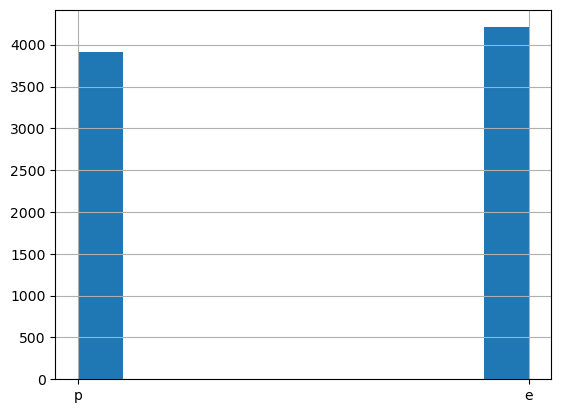

In [5]:
shroom["class"].hist()

### The data looks balanced, so no additional imbalance techinque is needed.

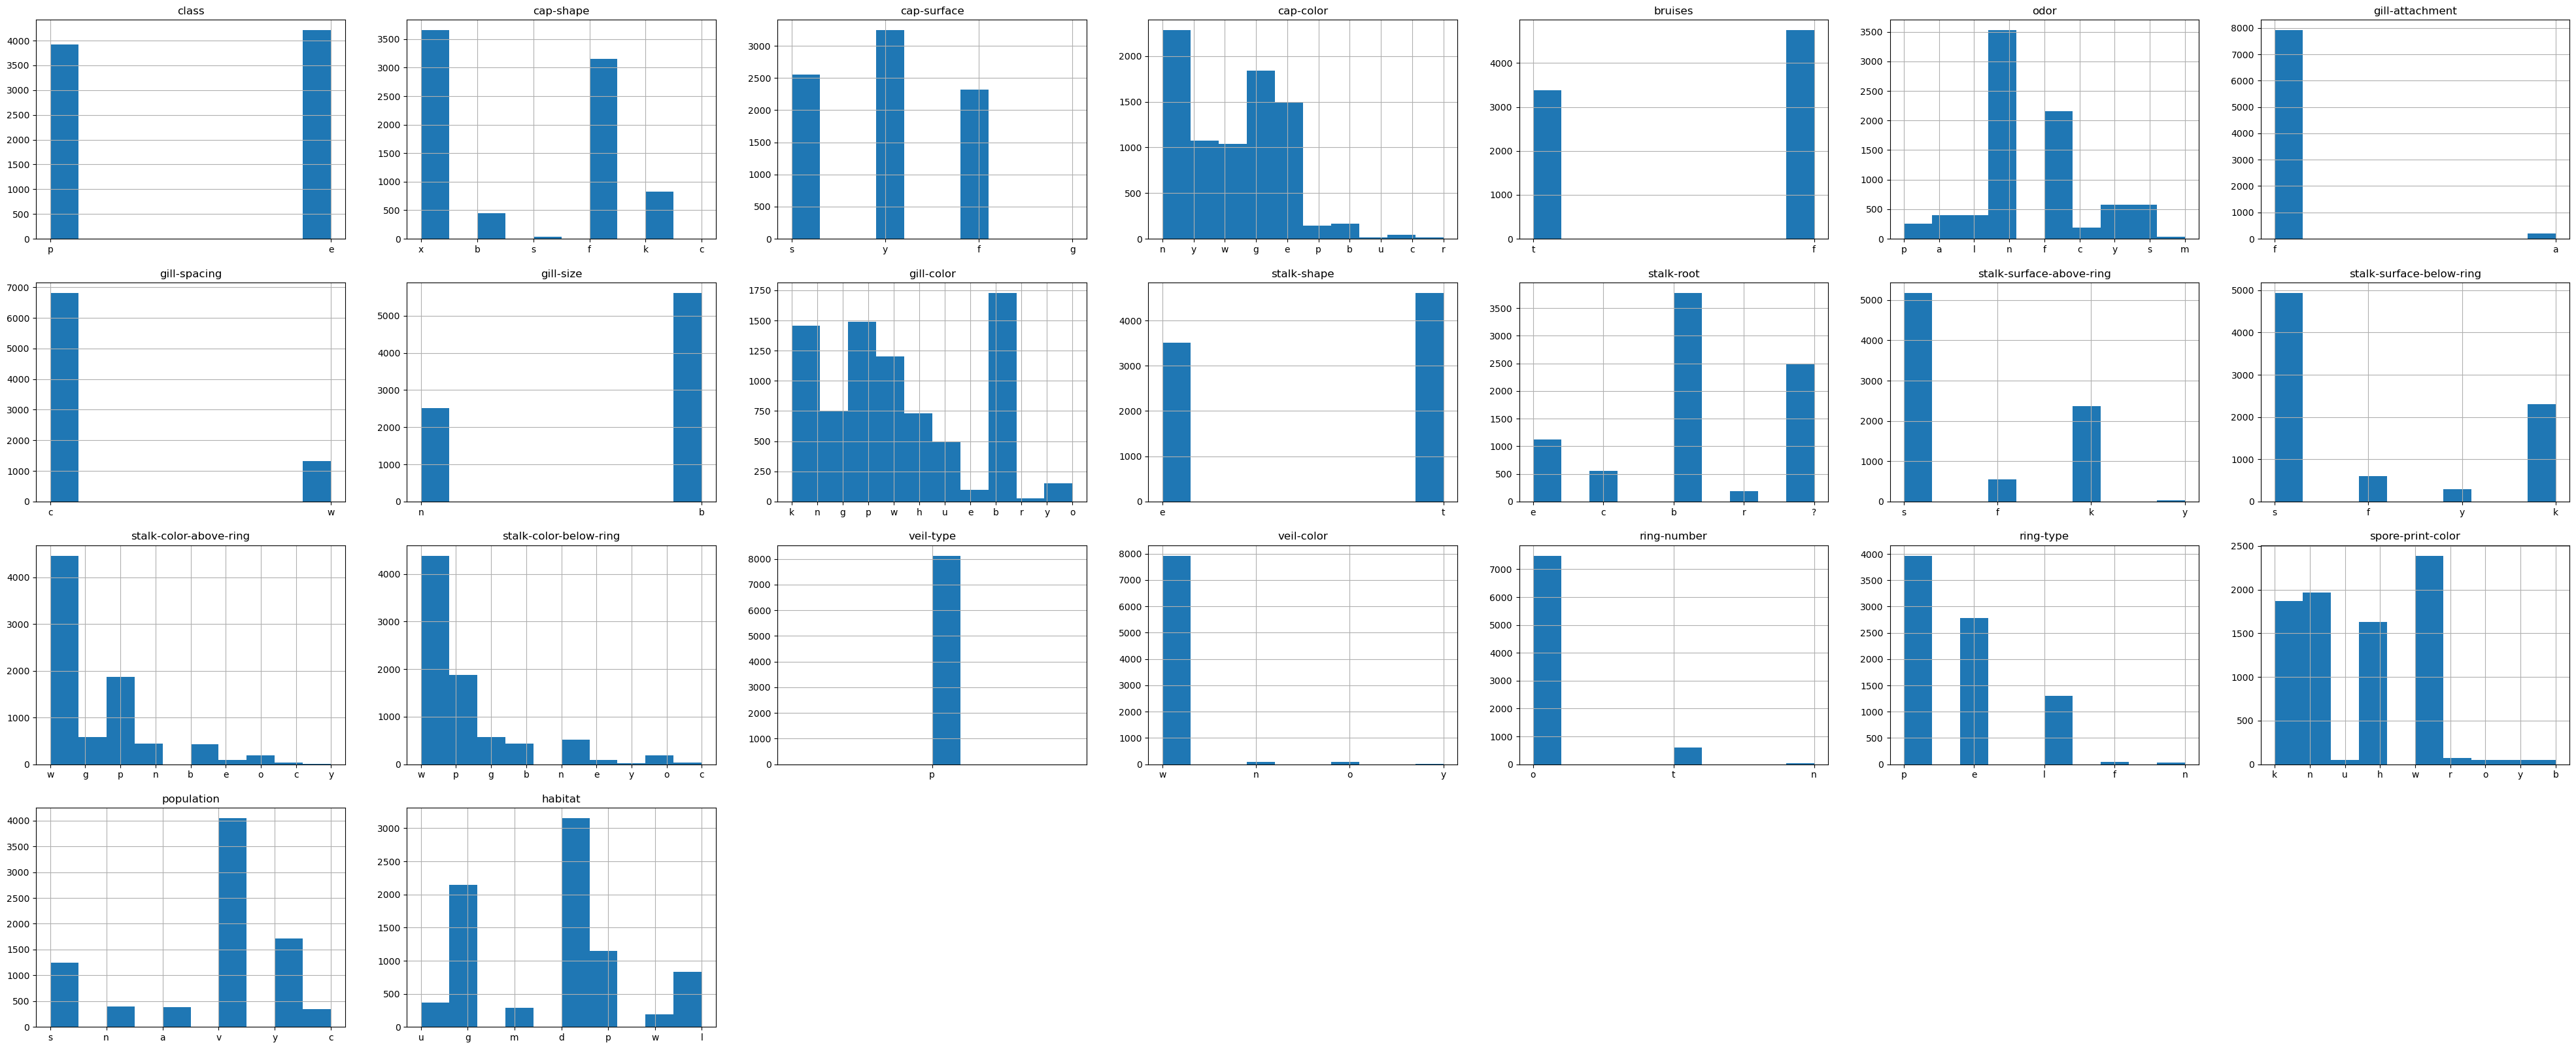

In [6]:
plt.rcParams['figure.figsize']= (50,20)
c=1
for i in shroom.columns:
  plt.subplot(4,7,c)
  plt.title(f"{i}")
  shroom[i].hist()
  c+=1
plt.show()

### Outlier possibility
A lot of variables have a categories whose representation is very low but we will use the method of retention as it might be important, so we will check how much each category in variable contributes to the variation in classification

In [7]:
shroom['class'].unique()
shroom['dclass'] = shroom['class'].apply(lambda x: 1 if x=='p' else 0)

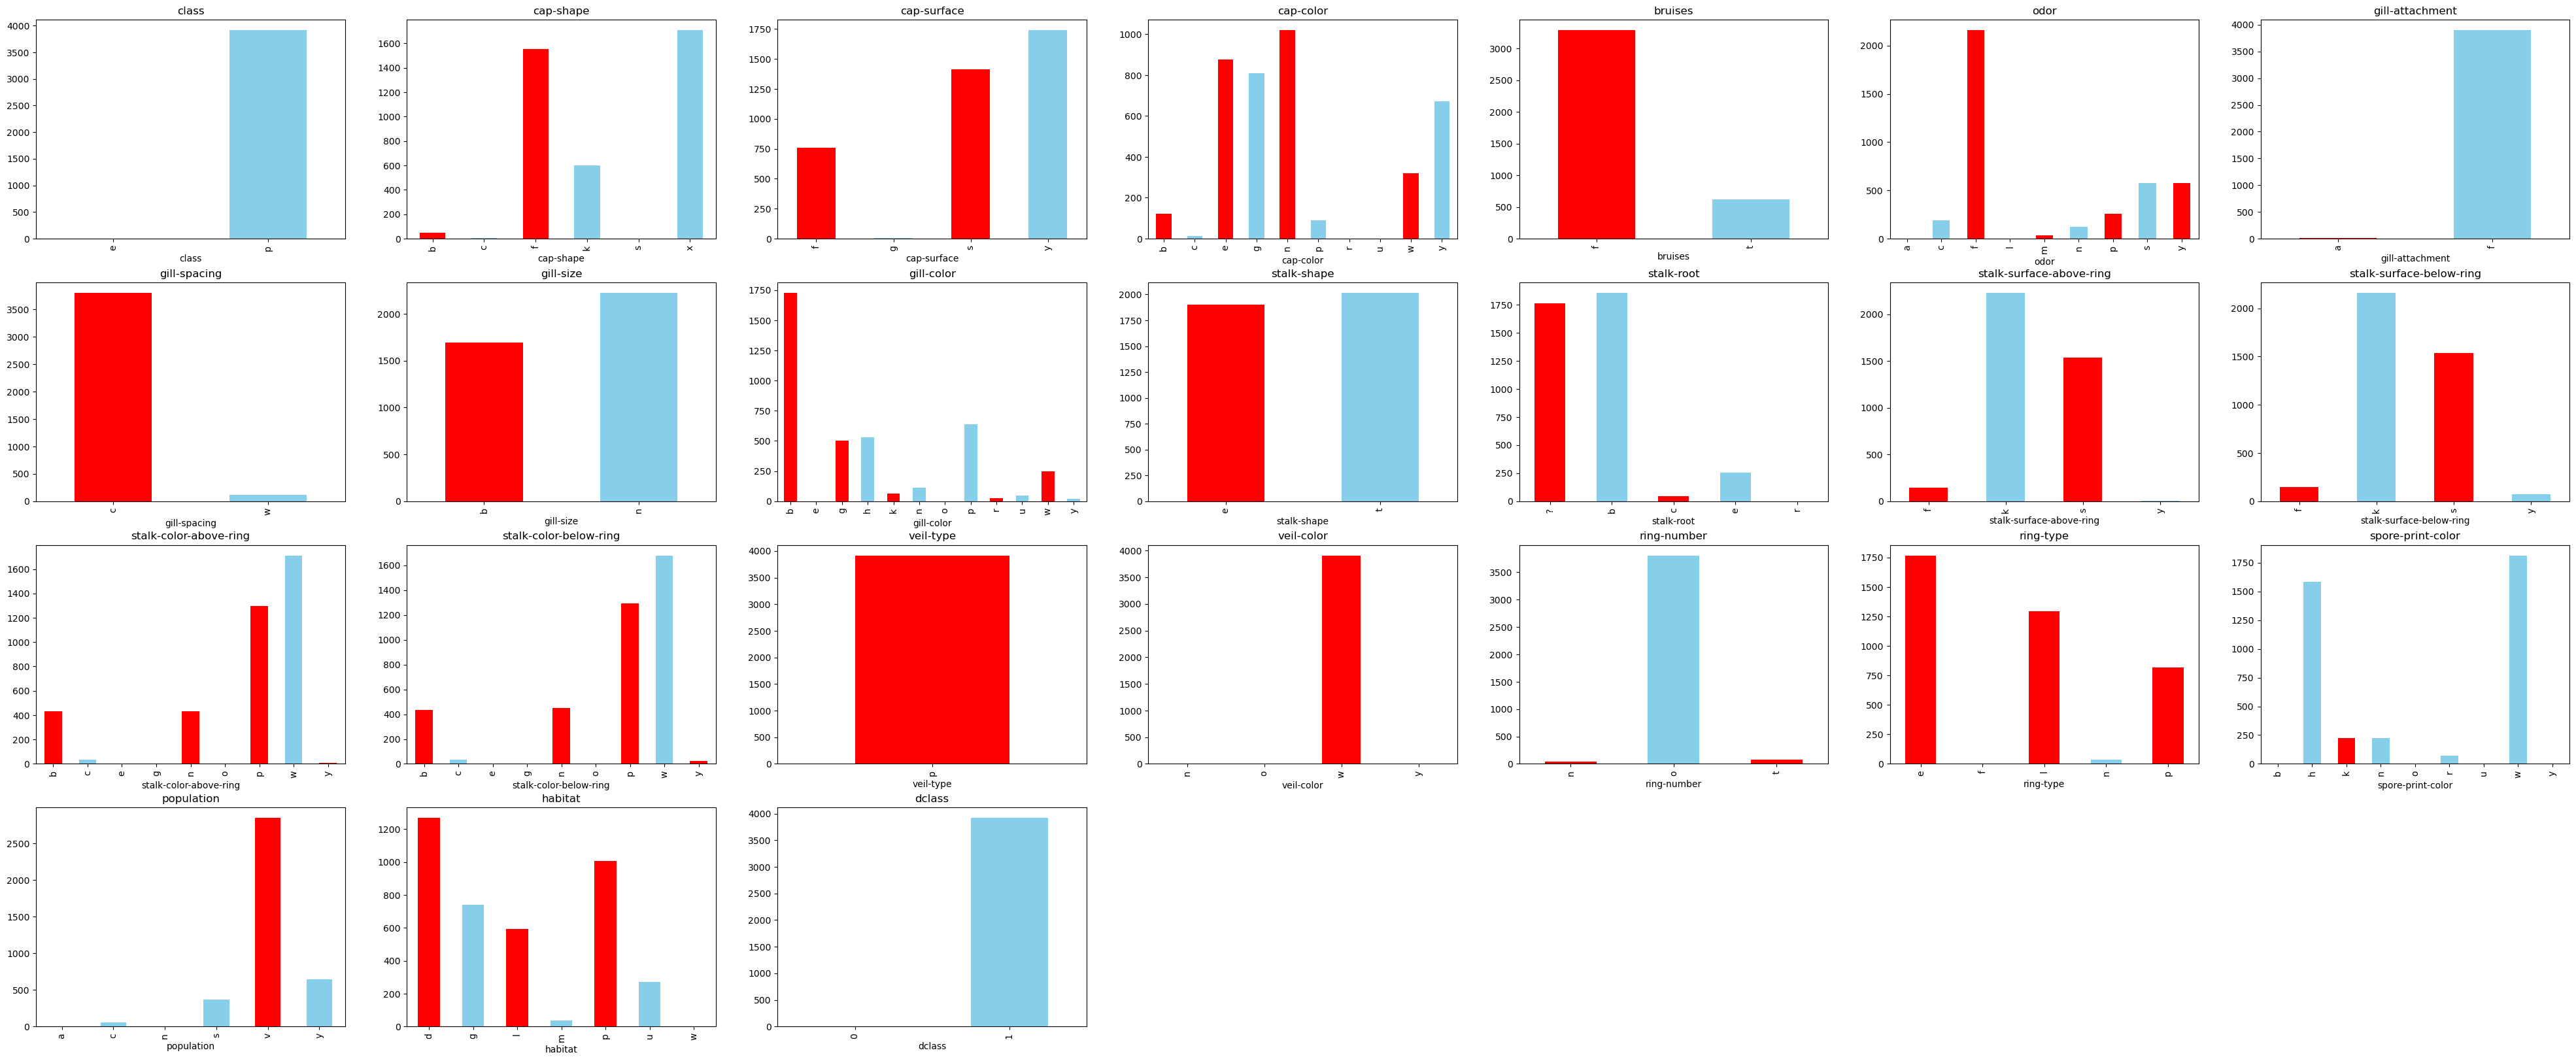

In [8]:
plt.rcParams['figure.figsize']= (50,20)
c=1
for i in shroom.columns:
  plt.subplot(4,7,c)
  plt.title(f"{i}")
  shroom.groupby(i)['dclass'].sum().plot(kind='bar',stacked=True, color=['red','skyblue'])
  c+=1
plt.show()

In [9]:
# Create a contingency table
for i in shroom.columns:
    contingency_table = pd.crosstab(shroom[i], shroom['dclass'])
    # Perform the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    # Display the results
    print(f"{i} Chi-square statistic: {chi2}", end=" ")
    print(f"P-value: {p}", end=" ")
    print(f"Degrees of freedom: {dof}")

class Chi-square statistic: 8119.99531939436 P-value: 0.0 Degrees of freedom: 1
cap-shape Chi-square statistic: 489.91995361895573 P-value: 1.196456568593578e-103 Degrees of freedom: 5
cap-surface Chi-square statistic: 315.0428312080377 P-value: 5.518427038649143e-68 Degrees of freedom: 3
cap-color Chi-square statistic: 387.59776897722986 P-value: 6.055814598336574e-78 Degrees of freedom: 9
bruises Chi-square statistic: 2041.4156474619554 P-value: 0.0 Degrees of freedom: 1
odor Chi-square statistic: 7659.726740165339 P-value: 0.0 Degrees of freedom: 8
gill-attachment Chi-square statistic: 133.9861812865668 P-value: 5.501707411861009e-31 Degrees of freedom: 1
gill-spacing Chi-square statistic: 984.1433330144739 P-value: 5.0229776137324786e-216 Degrees of freedom: 1
gill-size Chi-square statistic: 2366.8342569059605 P-value: 0.0 Degrees of freedom: 1
gill-color Chi-square statistic: 3765.7140862414803 P-value: 0.0 Degrees of freedom: 11
stalk-shape Chi-square statistic: 84.14203826548719

The veil type is not useful as seen from the chi-square distribution

In [13]:
X= shroom.drop(['veil-type','dclass','class'], axis=1)
y= shroom['dclass']
encoded_X = pd.get_dummies(X) 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



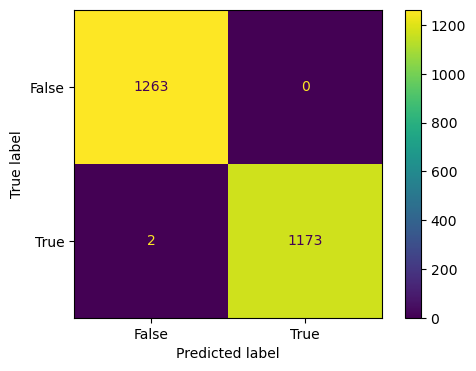

In [14]:
#Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(encoded_X, y, test_size=0.3, random_state=42, stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print("Classification Report:")
print(classification_rep)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
fig, ax = plt.subplots(figsize=(6, 4))
cm_display.plot(ax=ax)
plt.show()